In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import math

In [3]:
def generateODE(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11,c = m

    Ci=0.31075                     #gm/(100 gm of mixed solvent)
    Ce=0.02075                      #gm/(100 gm of mixed solvent)
    
    #calulate neccessary quantity
    A1= 0.001
    g1= 1.0909941519519688
    A2= 0.001
    g2= 1.1265983183138195
    kb= 1.7653536866624178
    b= 0.0936943466192764
    
    
    R = 8.314                        # joule\(k mol)
    T = 303.14                       # kelvin
    V = 0.0002                       # m3
    
    f= 3.33*10**-7                     # m3/sec 
    
    
    ρc = 1400*10**3                    # gm/m3
    h = 1*10**(-5)                     # m
    Vc = h*m11
    
    ρl = 785*10**3                     # gm/m3
    
    
    # Canti=np.linspace(0,1000,120)
    # Ce= ((-2*10**(-6)*Canti**3)+(0.0003*Canti**2)+(-0.0274*Canti)+1.232)
    
    delta_c = max(c-Ce,0)
    s= delta_c/Ce
    
    k=3.14/6
    tau = V/f
    
    Gl=A1*(s)**g1
    
    Gw=A2*(s)**g2
    
    B= kb*(s)**b                                #B= kJ1*math.exp((-kJ2)/(np.log((s)**2)))
    
    dm00= B 
    dm10=(Gl*m00)
    dm01=(Gw*m00)
    dm11=(Gl*m10)+(Gw*m01)
    
    #dm20=(2*Gl*m10)+(-m20/tau)
    #dc=(Ci/tau)-(c/tau)-(g*(2*Gl*m11-Gl*m20+Gw*m20))
    
    dc=(Ci/tau)-(ρc/ρl)*Vc
    if c + dc < 0:
        dc = -c

    return [dm00, dm10, dm01, dm11,dc]
t_span=(0, 600)
num_points_0= 600
initialConditions = [0, 0, 0, 0,0.31075]
sol = solve_ivp(
    lambda t,m: generateODE(t,m),
    t_span,
    initialConditions,
    t_eval=np.linspace(t_span[0], t_span[1], num_points_0)
)

Text(0, 0.5, 'Concentration')

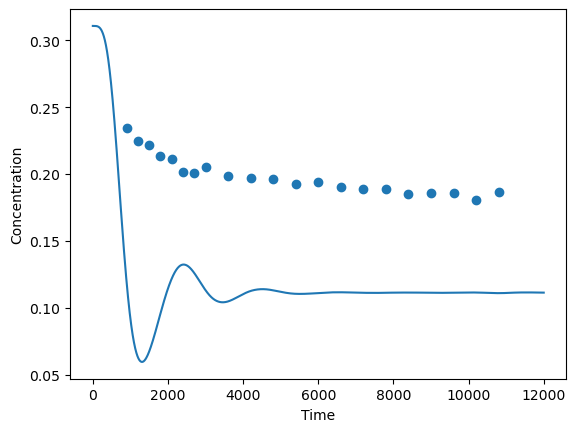

In [14]:
def generateODE3(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.31075                     # gm/(100 gm of mixed solvent)
    Ce = 0.02075                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    A1= 0.001
    g1= 1.3674422124010206
    A2= 0.001
    g2= 0.9806401378356327
    kb= 0.0009159735378591962
    b= 0.15727791169769848
    
    f = 3.33 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]
t_span3 = (0, 12000)  # Adjust this to match the maximum time in your data
num_points3 = 12000
initialConditions3 = [0, 0, 0, 0, 0.31075]
sol3 = solve_ivp(
    lambda t, m: generateODE3(t, m),
    t_span3,
    initialConditions3,
    t_eval=np.linspace(t_span3[0], t_span3[1], num_points3)
)
Time3 = [900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3600, 4200, 4800, 5400, 6000, 6600, 7200, 7800, 8400, 9000, 9600, 10200, 10800]
Concentration3 = [0.234794538,0.2244362203,0.2218997175,0.2135511693,0.2116248215,0.2014145427,0.200706537,0.2054129937,0.1984773812,0.1973842213,0.1966042281,0.1925221024,0.194455232,0.1906051571,0.1891694921,0.1886097215,0.1851571548,0.1858998494,0.1859415305,0.180795238,0.1868895788]
plt.scatter(Time3, Concentration3)
plt.plot(sol3.t,sol3.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")